# Module 6

## 6.1.4 Generate Random Latitudes and Longitudes

### Create Latitude and Longitude Combinations

In [3]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

### 6.1.5 Generate Random World Cities

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

## 6.2.6 Get the City Weather Data

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    * Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the ````city_url```` or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    * City, country, and date
    * Latitude and longitude
    * Maximum temperature
    * Humidity
    * Cloudiness
    * Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

### Import Dependencies, and Initialize an Empty List and Counters

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

### Loop Through the List of Cities and Build the City URL

Iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50

use ````for i in range(len(cities))```` and the index to tell us when we get to 50. We can also retrieve the city from the ````cities```` list and add it to the ````city_url```` by using indexing

Every time we want to reference the city in our code, we need to use the indexing on the ````cities```` list. Unfortunately, this will cause programming errors when we are building the ````city_url```` because it adds the index, not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.

Instead of using two for loops, we can use the ````enumerate()```` method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list.

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | banda aceh
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | taoudenni
Processing Record 11 of Set 1 | temaraia
City not found. Skipping...
Processing Record 12 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 1 | lasa
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | waingapu
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | yellowknife
Processi

Processing Record 39 of Set 4 | elhovo
Processing Record 40 of Set 4 | vangaindrano
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 43 of Set 4 | rockland
Processing Record 44 of Set 4 | kiyasovo
Processing Record 45 of Set 4 | deniliquin
Processing Record 46 of Set 4 | kaohsiung
Processing Record 47 of Set 4 | pasighat
Processing Record 48 of Set 4 | flin flon
Processing Record 49 of Set 4 | longyearbyen
Processing Record 50 of Set 4 | san quintin
Processing Record 1 of Set 5 | qingdao
Processing Record 2 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 5 | casa nova
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | kirakira
Processing Record 6 of Set 5 | krasnoselkup
Processing Record 7 of Set 5 | bredene
Processing Record 8 of Set 5 | witbank
Processing Record 9 of Set 5 | spisska nova ves
Processing Record 10 of Set 5 | cabo san 

Processing Record 23 of Set 8 | ha noi
Processing Record 24 of Set 8 | broome
Processing Record 25 of Set 8 | hasanabad
Processing Record 26 of Set 8 | mitu
Processing Record 27 of Set 8 | maracanau
Processing Record 28 of Set 8 | petatlan
Processing Record 29 of Set 8 | marsabit
Processing Record 30 of Set 8 | sheffield
Processing Record 31 of Set 8 | pompeu
Processing Record 32 of Set 8 | karakol
Processing Record 33 of Set 8 | ornskoldsvik
Processing Record 34 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 8 | lazaro cardenas
Processing Record 36 of Set 8 | yulara
Processing Record 37 of Set 8 | liniere
City not found. Skipping...
Processing Record 38 of Set 8 | dolzhanskaya
Processing Record 39 of Set 8 | invermere
Processing Record 40 of Set 8 | anadyr
Processing Record 41 of Set 8 | pangnirtung
Processing Record 42 of Set 8 | monster
Processing Record 43 of Set 8 | springbok
Processing Record 44 of Set 8 | el faiyum
City not found. Skipping...
Pro

Processing Record 14 of Set 12 | vigrestad
Processing Record 15 of Set 12 | sao felix do xingu
Processing Record 16 of Set 12 | aberdeen
Processing Record 17 of Set 12 | pocao de pedras
Processing Record 18 of Set 12 | inirida
Processing Record 19 of Set 12 | flinders
Processing Record 20 of Set 12 | kolokani
Processing Record 21 of Set 12 | olafsvik
Processing Record 22 of Set 12 | tubruq
City not found. Skipping...
Processing Record 23 of Set 12 | hailin
Processing Record 24 of Set 12 | goundam
Processing Record 25 of Set 12 | cumberland
Processing Record 26 of Set 12 | prieska
Processing Record 27 of Set 12 | biltine
Processing Record 28 of Set 12 | barao de melgaco
Processing Record 29 of Set 12 | nabire
Processing Record 30 of Set 12 | maningrida
Processing Record 31 of Set 12 | mehamn
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
city_data

[{'City': 'Lagoa',
  'Lat': 39.05,
  'Lng': -27.9833,
  'Max Temp': 68.61,
  'Humidity': 67,
  'Cloudiness': 53,
  'Wind Speed': 10.58,
  'Country': 'PT',
  'Date': '2021-08-07 23:32:24'},
 {'City': 'Banda Aceh',
  'Lat': 5.5577,
  'Lng': 95.3222,
  'Max Temp': 79.75,
  'Humidity': 82,
  'Cloudiness': 91,
  'Wind Speed': 7.16,
  'Country': 'ID',
  'Date': '2021-08-07 23:32:24'},
 {'City': 'Torbay',
  'Lat': 47.6666,
  'Lng': -52.7314,
  'Max Temp': 67.68,
  'Humidity': 88,
  'Cloudiness': 75,
  'Wind Speed': 19.57,
  'Country': 'CA',
  'Date': '2021-08-07 23:32:25'},
 {'City': 'Airai',
  'Lat': -8.9266,
  'Lng': 125.4092,
  'Max Temp': 64.36,
  'Humidity': 44,
  'Cloudiness': 28,
  'Wind Speed': 3.6,
  'Country': 'TL',
  'Date': '2021-08-07 23:32:25'},
 {'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 50.41,
  'Humidity': 100,
  'Cloudiness': 90,
  'Wind Speed': 3.44,
  'Country': 'ZA',
  'Date': '2021-08-07 23:28:09'},
 {'City': 'Port Alfred',
  'Lat': -33.5906

## 6.2.7 Create a DataFrame of City Weather Data

Next steps: converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

**re**: converting to a list of dictionaries to a dataframe
    ````df = pd.DataFrame(list with dictionaries)````

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,68.61,67,53,10.58,PT,2021-08-07 23:32:24
1,Banda Aceh,5.5577,95.3222,79.75,82,91,7.16,ID,2021-08-07 23:32:24
2,Torbay,47.6666,-52.7314,67.68,88,75,19.57,CA,2021-08-07 23:32:25
3,Airai,-8.9266,125.4092,64.36,44,28,3.60,TL,2021-08-07 23:32:25
4,Cape Town,-33.9258,18.4232,50.41,100,90,3.44,ZA,2021-08-07 23:28:09
5,Port Alfred,-33.5906,26.8910,59.07,78,81,10.63,ZA,2021-08-07 23:32:25
6,Faanui,-16.4833,-151.7500,78.39,73,29,7.78,PF,2021-08-07 23:32:25
7,Taoudenni,22.6783,-3.9836,102.22,10,3,12.08,ML,2021-08-07 23:32:26
8,Lasa,46.6166,10.7002,63.86,96,88,2.55,IT,2021-08-07 23:32:26
9,Puerto Ayora,-0.7393,-90.3518,71.55,85,69,8.01,EC,2021-08-07 23:32:26


Next steps: reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

**REWIND**: to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear: 

````new_column_order = ["column2", "column4", "column1"]````

Then, we assign a new or the same DataFrame with new column order:

````df = df[new_column_order]````

In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-08-07 23:32:24,39.0500,-27.9833,68.61,67,53,10.58
1,Banda Aceh,ID,2021-08-07 23:32:24,5.5577,95.3222,79.75,82,91,7.16
2,Torbay,CA,2021-08-07 23:32:25,47.6666,-52.7314,67.68,88,75,19.57
3,Airai,TL,2021-08-07 23:32:25,-8.9266,125.4092,64.36,44,28,3.60
4,Cape Town,ZA,2021-08-07 23:28:09,-33.9258,18.4232,50.41,100,90,3.44
5,Port Alfred,ZA,2021-08-07 23:32:25,-33.5906,26.8910,59.07,78,81,10.63
6,Faanui,PF,2021-08-07 23:32:25,-16.4833,-151.7500,78.39,73,29,7.78
7,Taoudenni,ML,2021-08-07 23:32:26,22.6783,-3.9836,102.22,10,3,12.08
8,Lasa,IT,2021-08-07 23:32:26,46.6166,10.7002,63.86,96,88,2.55
9,Puerto Ayora,EC,2021-08-07 23:32:26,-0.7393,-90.3518,71.55,85,69,8.01


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Plot Latitude vs. Temperature

Create a series of scatter plots for each weather parameter against the latitude for all the cities.

**REWIND**: Recall that to create a scatter plot, we collect then add x- and y-axis data to ````plt.scatter()````

### Get Data for Plotting

In [18]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

Your final scatter plot will need the current date in the title. 

To add the current date: import the ````time```` module. Calling the ````time()```` function with the ````time```` module, we get the output of today's time in seconds since January 1, 1970, as a floating-point decimal number.

The datetime module that we used to convert the date is not the best module for us.

In [19]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()

today

1628382750.584317

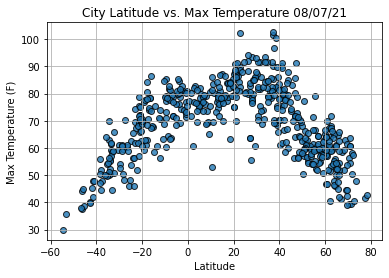

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## 6.3.2 Plot Latitude vs. Humidity

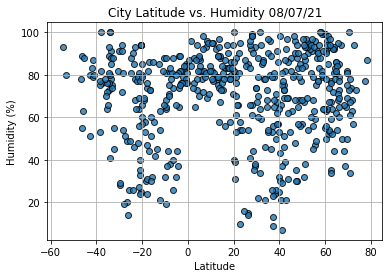

In [21]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## 6.3.3 Plot Latitude vs. Cloudiness

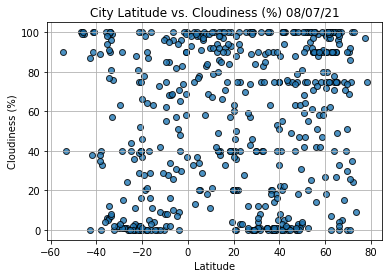

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## 6.3.4 Plot Latitude vs. Wind Speed

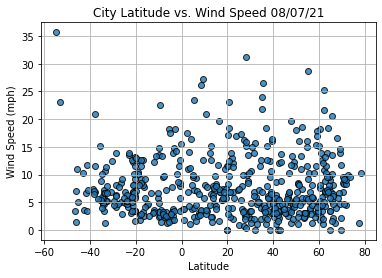

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

This would be the base code, we're using. The x_values are the latitude values with the y values being the weather parameters.

````
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()
````

### Create a Linear Regression Function

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames

**re**: To create a new DataFrame from a current DataFrame, use the ````loc```` method on the current DataFrame. The ````loc```` method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is ````row = df.loc[row_index]````.

In [25]:
index13 = city_data_df.loc[13]

In [26]:
# present all the information at index 13 of the city_data_df
index13

City                  Yellowknife
Country                        CA
Date          2021-08-07 23:32:02
Lat                        62.456
Lng                     -114.3525
Max Temp                    59.52
Humidity                       67
Cloudiness                     90
Wind Speed                  25.32
Name: 13, dtype: object

We can also filter a DataFrame based on a value of a row. i.e., if we want all of the Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df using ````city_data_df["Lat"] >= 0````. Executing this code will return either "True" or "False" for all the rows that meet these criteria.

In [27]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
527     True
528    False
529    False
530    False
531     True
Name: Lat, Length: 532, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-08-07 23:32:24,39.0500,-27.9833,68.61,67,53,10.58
1,Banda Aceh,ID,2021-08-07 23:32:24,5.5577,95.3222,79.75,82,91,7.16
2,Torbay,CA,2021-08-07 23:32:25,47.6666,-52.7314,67.68,88,75,19.57
7,Taoudenni,ML,2021-08-07 23:32:26,22.6783,-3.9836,102.22,10,3,12.08
8,Lasa,IT,2021-08-07 23:32:26,46.6166,10.7002,63.86,96,88,2.55


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set:
- x values equal to the latitude column
- y values equal to the maximum temperature column

pull both values from the ````northern_hemi_df````.

Once the values are set, we'll use the ````plot_linear_regression```` function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot.

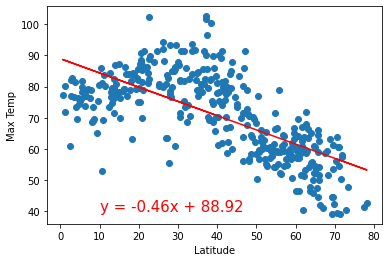

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

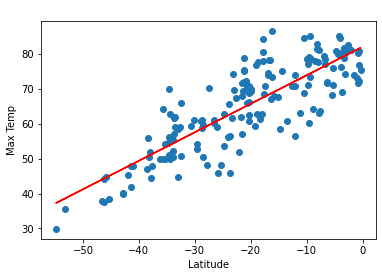

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

**FINDING**: The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. 

This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler.

##  6.4.3 Find the Correlation Between Latitude and Percent Humidity

Since we already created the data frames and the function, all we have to do is call the function and define our x, y values along with the title, label and text coordinates.

**re**: The hemisphere dataframes we created are
- southern_hemi_df
- northern_hemi_df

The function we created is:
    ````plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)````
    
### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

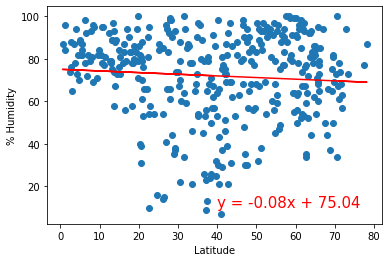

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

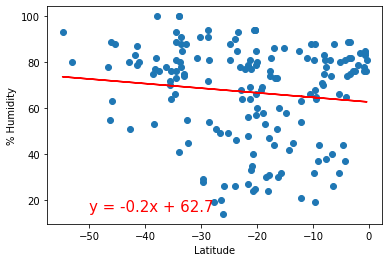

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

**FINDING**: The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.

## 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

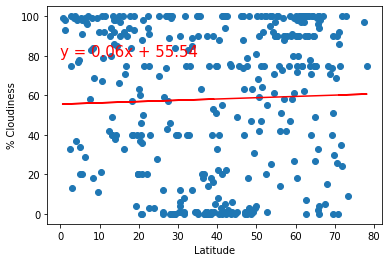

In [36]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,80))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

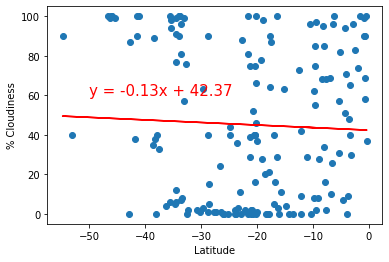

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

**FINDING**: The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 

## 6.4.5 Find the Correlation Between Latitude and Wind Speed

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

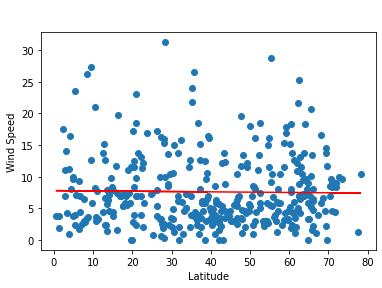

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

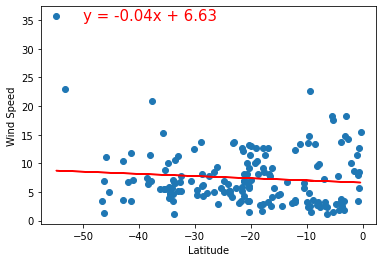

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

**FINDING**: The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 